#**SISTEMA** **PLANETARIO** 

Ingrese la coordenada x de la estrella (en km): 0
Ingrese la coordenada y de la estrella (en km): 0
Ingrese la masa de la estrella (en kg): 100000000
Ingrese el número de planetas: 3
Ingrese el nombre del planeta 1: JD
Ingresando planeta JD:
Ingrese la coordenada x del planeta (en km): 100
Ingrese la coordenada y del planeta (en km): 100
Ingrese la masa del planeta (en kg): 10000
Ingrese el nombre del planeta 2: HG
Ingresando planeta HG:
Ingrese la coordenada x del planeta (en km): 100
Ingrese la coordenada y del planeta (en km): 100
Ingrese la masa del planeta (en kg): 100
Ingrese el nombre del planeta 3: NM
Ingresando planeta NM:
Ingrese la coordenada x del planeta (en km): 300
Ingrese la coordenada y del planeta (en km): 300
Ingrese la masa del planeta (en kg): 3000
=== Información de los planetas ===
JD:
Coordenadas: (100.0, 100.0)
Distancia a la estrella: 141.4213562373095 km
Fuerza gravitacional de la estrella: 0.0033371499999999997 N
HG:
Coordenadas: (100.0, 100.0)
Distancia a l

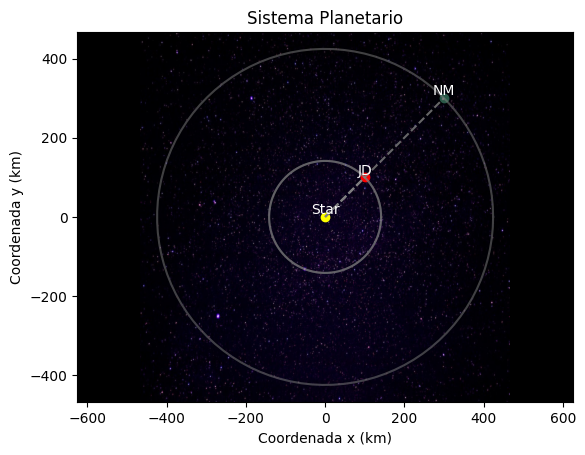

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from math import sqrt


class SistemaPlanetario:
    def __init__(self):
        self.estrella_x = 0
        self.estrella_y = 0
        self.estrella_masa = 0
        self.planetas = {}

    def ingresar_estrella(self):
      #Permite ingresar la información de la estrella del sistema planetario.
      #Solicita las coordenadas (x, y) de la estrella y su masa.
        while True:
            try:
                self.estrella_x = float(input("Ingrese la coordenada x de la estrella (en km): "))
                self.estrella_y = float(input("Ingrese la coordenada y de la estrella (en km): "))
                self.estrella_masa = float(input("Ingrese la masa de la estrella (en kg): "))
                break
            except ValueError:
                print("Error: Ingrese un valor numérico válido.")

    def ingresar_planeta(self, nombre):

        """
        Permite ingresar la información de un planeta del sistema planetario.
        Solicita las coordenadas (x, y) del planeta y su masa.
        Verifica que las coordenadas no sean iguales a las de la estrella.
        """
        while True:
            try:
                planeta_x = float(input("Ingrese la coordenada x del planeta (en km): "))
                planeta_y = float(input("Ingrese la coordenada y del planeta (en km): "))

                if planeta_x == self.estrella_x and planeta_y == self.estrella_y:
                    print("Error: Las coordenadas del planeta no pueden ser iguales a las de la estrella.¡La estrella desintegra al planeta!")
                    continue

                masa = float(input("Ingrese la masa del planeta (en kg): "))
                self.planetas[nombre] = (planeta_x, planeta_y, masa)
                break
            except ValueError:
                print("Error: Ingrese un valor numérico válido.")

    def calcular_distancia(self, x1, y1, x2, y2):
        """
        Calcula la distancia euclidiana entre dos puntos en un plano.
        """
        distancia = sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        return distancia

    def calcular_fuerza_gravitacional(self, masa1, masa2, distancia):
        """
        Calcula la fuerza gravitacional entre dos cuerpos utilizando la ley de gravitación universal.
        """
        constante_gravitacional = (6.67430e-11)*(1e-6)
        fuerza = (constante_gravitacional * masa1 * masa2) / (distancia ** 2)
        return fuerza

    def imprimir_info_planetas(self):
        """
        Imprime la información de los planetas en el sistema.
        Muestra las coordenadas, distancia a la estrella y fuerza gravitacional de cada planeta.
        """
        print("=== Información de los planetas ===")
        for nombre, planeta in self.planetas.items():
            planeta_x, planeta_y, masa = planeta
            distancia = self.calcular_distancia(self.estrella_x, self.estrella_y, planeta_x, planeta_y)
            fuerza = self.calcular_fuerza_gravitacional(self.estrella_masa, masa, distancia)

            print(f"{nombre}:")
            print(f"Coordenadas: ({planeta_x}, {planeta_y})")
            print(f"Distancia a la estrella: {distancia} km")
            print(f"Fuerza gravitacional de la estrella: {fuerza} N")
            print("==========================")

    def graficar_sistema(self, background_image):
        """
        Grafica el sistema planetario en un plano.
        Muestra la estrella, los planetas y las órbitas de los planetas alrededor de la estrella.
        """
        fig, ax = plt.subplots()
        ax.set_facecolor('black')

        if self.estrella_masa > max([planeta[2] for planeta in self.planetas.values()]):
            ax.scatter(self.estrella_x, self.estrella_y, c="yellow", label="Estrella")
            ax.text(self.estrella_x, self.estrella_y, "Star", color="white", ha='center', va='bottom')

            colisionados = []
            mayor_masa = 0
            planeta_sobreviviente = ""

            for nombre, planeta in self.planetas.items():
                planeta_x, planeta_y, masa = planeta

                color = np.random.rand(3)

                ax.plot([self.estrella_x, planeta_x], [self.estrella_y, planeta_y], linestyle='--', color='gray',
                        alpha=0.8)

                theta = np.linspace(0, 2 * np.pi, 100)
                distancia = self.calcular_distancia(self.estrella_x, self.estrella_y, planeta_x, planeta_y)
                orbita_x = self.estrella_x + distancia * np.cos(theta)
                orbita_y = self.estrella_y + distancia * np.sin(theta)
                ax.plot(orbita_x, orbita_y, color='gray', alpha=0.5)

                if masa > mayor_masa:
                    mayor_masa = masa
                    planeta_sobreviviente = nombre

                for colisionado, datos in self.planetas.items():
                    if colisionado != nombre and colisionado not in colisionados:
                        colisionado_x, colisionado_y, colisionado_masa = datos
                        colisionado_distancia = self.calcular_distancia(planeta_x, planeta_y, colisionado_x,
                                                                        colisionado_y)

                        if colisionado_distancia < 5 or distancia == colisionado_distancia:
                            colisionados.append(nombre)
                            colisionados.append(colisionado)
                            print(f"Colisión detectada entre {nombre} y {colisionado}.")

            if planeta_sobreviviente != "":
                print(f"\nEl planeta sobreviviente es: {planeta_sobreviviente}")

                planeta_x, planeta_y, _ = self.planetas[planeta_sobreviviente]

                ax.scatter(planeta_x, planeta_y, color="red", label=f"{planeta_sobreviviente}")
                ax.text(planeta_x, planeta_y, f"{planeta_sobreviviente}", ha='center', va='bottom', color="white")

            for nombre, planeta in self.planetas.items():
                if nombre not in colisionados and nombre != planeta_sobreviviente:
                    planeta_x, planeta_y, _ = planeta

                    ax.scatter(planeta_x, planeta_y, color=[color], label=f"{nombre}")
                    ax.text(planeta_x, planeta_y, f"{nombre}", ha='center', va='bottom', color="white")

        else:
            print("La estrella no tiene la mayor masa. Los planetas no rotan alrededor de la estrella.")

        plt.xlabel("Coordenada x (km)")
        plt.ylabel("Coordenada y (km)")
        plt.title("Sistema Planetario")

        x_min, x_max = ax.get_xlim()
        y_min, y_max = ax.get_ylim()
        ax.imshow(background_image, extent=[x_min, x_max, y_min, y_max], aspect='auto')

        plt.axis('equal')
        #plt.legend()
        plt.show()


sistema = SistemaPlanetario()
sistema.ingresar_estrella()

num_planetas = int(input("Ingrese el número de planetas: "))
for i in range(num_planetas):
    nombre = input(f"Ingrese el nombre del planeta {i + 1}: ")
    print(f"Ingresando planeta {nombre}:")
    sistema.ingresar_planeta(nombre)

sistema.imprimir_info_planetas()

background_image = mpimg.imread("/content/espacio_2.jpg")  # Reemplaza "ruta_de_la_imagen.jpg" con la ruta de tu imagen

sistema.graficar_sistema(background_image)


#**SISTEMA DE CARGAS**


Ingrese el valor de la carga de prueba en Coulombs: 1
Ingrese la coordenada x de la carga de prueba en centímetros: 0
Ingrese la coordenada y de la carga de prueba en centímetros: 0
Ingrese el número de cargas: 1
Ingrese el nombre de la carga 1: q1
Ingrese el valor de la carga 1 en Coulombs: 0.1
Ingrese la coordenada x de la carga 1 en centímetros: 10
Ingrese la coordenada y de la carga 1 en centímetros: 0
=== Información de las cargas ===
q1:
Coordenadas: (10.0, 0.0)
Valor de la carga: 0.1 C
Distancia a la carga de prueba: 10.00 cm
Fuerza eléctrica sobre la carga de prueba: 0.0000000900 N
Fuerza total sobre la carga de prueba: 0.0000000900 N


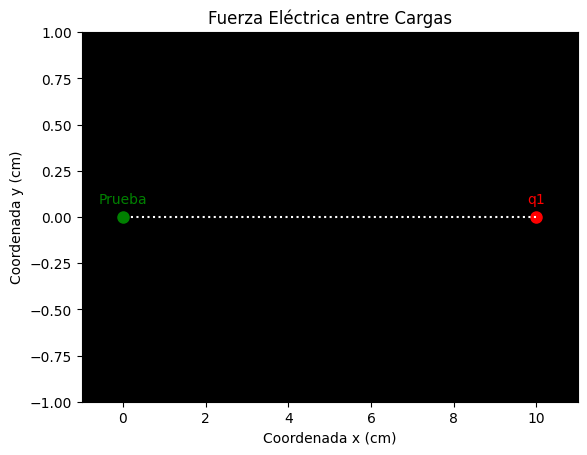

In [ ]:
import matplotlib.pyplot as plt
import math

def validar_ingreso_numerico(func):
    def wrapper(*args, **kwargs):
        while True:
            try:
                return func(*args, **kwargs)
            except ValueError:
                print("Error: Ingrese un valor numérico válido.")

    return wrapper

class Carga:
    """
    Clase que representa una carga con su nombre, valor en Coulombs, y coordenadas x e y.
    """
    def __init__(self, nombre, carga, x, y):
        """
        Inicializa una instancia de la clase Carga.

        Args:
            nombre (str): El nombre de la carga.
            carga (float): El valor de la carga en Coulombs.
            x (float): La coordenada x de la carga en centímetros.
            y (float): La coordenada y de la carga en centímetros.
        """
        self.nombre = nombre
        self.carga = carga
        self.x = x
        self.y = y

def calcular_fuerza_electrica(carga_prueba, cargas):
    """
    Calcula la fuerza eléctrica total sobre una carga de prueba debido a otras cargas.

    Args:
        carga_prueba (Carga): La carga de prueba.
        cargas (list): Lista de objetos de tipo Carga que representan las otras cargas.

    Returns:
        float: La fuerza eléctrica total sobre la carga de prueba en Newtons.
    """
    fuerza_total = 0
    for carga in cargas:
        dx = carga.x - carga_prueba.x
        dy = carga.y - carga_prueba.y
        distancia = math.sqrt(dx**2 + dy**2)
        fuerza = (9 * 10**(-5) * carga.carga * carga_prueba.carga) / distancia**2
        fuerza_total += fuerza
    return fuerza_total

def graficar_cargas(cargas, carga_prueba):
    """
    Grafica las cargas y la carga de prueba en un plano cartesiano.

    Args:
        cargas (list): Lista de objetos de tipo Carga.
        carga_prueba (Carga): La carga de prueba.
    """
    fig, ax = plt.subplots()

    # Configurar el fondo de la gráfica
    ax.set_facecolor('black')

    # Calcular los límites del gráfico
    x_values = [carga.x for carga in cargas] + [carga_prueba.x]
    y_values = [carga.y for carga in cargas] + [carga_prueba.y]
    x_min = min(x_values)
    x_max = max(x_values)
    y_min = min(y_values)
    y_max = max(y_values)
    margin = max(x_max - x_min, y_max - y_min) * 0.1
    ax.set_xlim(x_min - margin, x_max + margin)
    ax.set_ylim(y_min - margin, y_max + margin)

    for carga in cargas:
        color = 'red' if carga.carga > 0 else 'blue'
        ax.plot(carga.x, carga.y, marker='o', markersize=8, color=color)
        ax.annotate(carga.nombre, (carga.x, carga.y), textcoords="offset points", xytext=(0,10), ha='center', color=color)
        ax.plot([carga.x, carga_prueba.x], [carga.y, carga_prueba.y], linestyle='dotted', color='white')

    ax.plot(carga_prueba.x, carga_prueba.y, marker='o', markersize=8, color='green')
    ax.annotate("Prueba", (carga_prueba.x, carga_prueba.y), textcoords="offset points", xytext=(0,10), ha='center', color='green')

    plt.xlabel('Coordenada x (cm)')
    plt.ylabel('Coordenada y (cm)')
    plt.title('Fuerza Eléctrica entre Cargas')
    #plt.grid(True)
    plt.show()

@validar_ingreso_numerico
def ingresar_cargas():
    """
    Solicita al usuario ingresar las cargas y sus coordenadas.

    Returns:
        list: Lista de objetos de tipo Carga.
    """
    cargas = []
    num_cargas = 0
    while True:
        try:
            num_cargas = int(input("Ingrese el número de cargas: "))
            break
        except ValueError:
            print("Error: Ingrese un número válido para el número de cargas.")

    for i in range(1, num_cargas + 1):
        while True:
            try:
                nombre = input("Ingrese el nombre de la carga {}: ".format(i))
                carga = float(input("Ingrese el valor de la carga {} en Coulombs: ".format(i)))
                x = float(input("Ingrese la coordenada x de la carga {} en centímetros: ".format(i)))
                y = float(input("Ingrese la coordenada y de la carga {} en centímetros: ".format(i)))
                break
            except ValueError:
                print("Error: Ingrese valores numéricos válidos para la carga {}.".format(i))
        cargas.append(Carga(nombre, carga, x, y))
    return cargas

def verificar_cargas(cargas):
    """
    Verifica si las cargas tienen las mismas coordenadas.

    Args:
        cargas (list): Lista de objetos de tipo Carga.

    Returns:
        bool: True si todas las cargas tienen coordenadas distintas, False de lo contrario.
    """
    coordenadas = set()
    for carga in cargas:
        coordenada = (carga.x, carga.y)
        if coordenada in coordenadas:
            return False
        coordenadas.add(coordenada)
    return True

def info_cargas(cargas, carga_prueba):
    """
    Imprime la información de cada carga, incluyendo sus coordenadas, valor en Coulombs, distancia a la carga de prueba y fuerza eléctrica de la carga de prueba sobre esta.

    Args:
        cargas (list): Lista de objetos de tipo Carga.
        carga_prueba (Carga): La carga de prueba.
    """
    print("=== Información de las cargas ===")
    for carga in cargas:
        dx = carga.x - carga_prueba.x
        dy = carga.y - carga_prueba.y
        distancia = math.sqrt(dx**2 + dy**2)
        fuerza = (9 * 10**(-5) * carga.carga * carga_prueba.carga) / distancia**2

        print(carga.nombre + ":")
        print("Coordenadas: ({}, {})".format(carga.x, carga.y))
        print("Valor de la carga: {} C".format(carga.carga))
        print("Distancia a la carga de prueba: {:.2f} cm".format(distancia))
        print("Fuerza eléctrica sobre la carga de prueba: {:.10f} N".format(fuerza))
        print("==========================")

def main():
    while True:
        try:
            carga_prueba = float(input("Ingrese el valor de la carga de prueba en Coulombs: "))
            x_prueba = float(input("Ingrese la coordenada x de la carga de prueba en centímetros: "))
            y_prueba = float(input("Ingrese la coordenada y de la carga de prueba en centímetros: "))
            break
        except ValueError:
            print("Error: Ingrese valores numéricos válidos para la carga de prueba.")

    cargas = ingresar_cargas()

    carga_prueba = Carga("Prueba", carga_prueba, x_prueba, y_prueba)

    while not verificar_cargas(cargas):
        print("Error: No se pueden colocar dos cargas en las mismas coordenadas.")
        cargas = ingresar_cargas()

    fuerza_total = calcular_fuerza_electrica(carga_prueba, cargas)
    info_cargas(cargas, carga_prueba)
    print("Fuerza total sobre la carga de prueba: {:.10f} N".format(fuerza_total))
    graficar_cargas(cargas, carga_prueba)

if __name__ == '__main__':
    main()


#**TIRO PARABÓLICO** corregir animación

Ingrese la altura inicial (en metros): 0
Ingrese la velocidad inicial en el eje X (en m/s): 50
Ingrese la velocidad inicial en el eje Y (en m/s): 50
Ingrese el ángulo de lanzamiento (en grados): 45
Tiempo de vuelo: 10.20 segundos
Alcance horizontal: 510.20 metros
Altura máxima: 127.55 metros


<ipython-input-24-565ba07794d2>:75: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  punto.set_data(x, y)


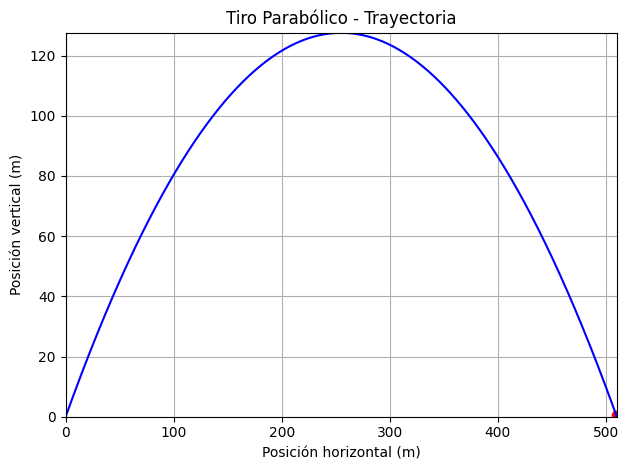

In [24]:
import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation
from IPython.display import HTML



class TiroParabolico:
    def __init__(self, altura, velocidad_x, velocidad_y, angulo):
        self.altura = altura
        self.velocidad_x = velocidad_x
        self.velocidad_y = velocidad_y
        self.angulo = angulo

    def calcular_tiempo_vuelo(self):
        tiempo_vuelo = (2 * self.velocidad_y) / 9.8
        return tiempo_vuelo

    def calcular_alcance_horizontal(self):
        alcance_horizontal = self.velocidad_x * self.calcular_tiempo_vuelo()
        return alcance_horizontal

    def calcular_altura_maxima(self):
        altura_maxima = self.altura + (self.velocidad_y ** 2) / (2 * 9.8)
        return altura_maxima

    def calcular_posicion(self, tiempo):
        posicion_x = self.velocidad_x * tiempo
        posicion_y = self.altura + self.velocidad_y * tiempo - 0.5 * 9.8 * tiempo ** 2
        return posicion_x, posicion_y

def verificar_valores_numericos(func):
    def wrapper(*args):
        try:
            for arg in args[1:]:
                float(arg)
        except ValueError:
            raise ValueError("Los valores deben ser numéricos.")
        return func(*args)
    return wrapper

@verificar_valores_numericos
def main(altura, velocidad_x, velocidad_y, angulo):
    tiro = TiroParabolico(altura, velocidad_x, velocidad_y, angulo)
    tiempo_vuelo = tiro.calcular_tiempo_vuelo()
    alcance_horizontal = tiro.calcular_alcance_horizontal()
    altura_maxima = tiro.calcular_altura_maxima()

    print(f"Tiempo de vuelo: {tiempo_vuelo:.2f} segundos")
    print(f"Alcance horizontal: {alcance_horizontal:.2f} metros")
    print(f"Altura máxima: {altura_maxima:.2f} metros")

    fig, ax = plt.subplots()
    ax.set_xlim(0, alcance_horizontal)
    ax.set_ylim(0, altura_maxima)

    punto, = ax.plot([], [], 'ro')

    trayectoria_x = []
    trayectoria_y = []
    for t in range(int(tiempo_vuelo * 100) + 1):
        x, y = tiro.calcular_posicion(t / 100)
        trayectoria_x.append(x)
        trayectoria_y.append(y)

    trayectoria, = ax.plot(trayectoria_x, trayectoria_y, 'b-')

    def init():
        punto.set_data([], [])
        return punto,

    def update(frame):
        t = frame / (int(tiempo_vuelo * 100) + 1) * tiempo_vuelo
        x, y = tiro.calcular_posicion(t)
        punto.set_data(x, y)
        return punto,

    ani = FuncAnimation(fig, update, frames=int(tiempo_vuelo * 100) + 1, init_func=init, blit=True)

    plt.xlabel('Posición horizontal (m)')
    plt.ylabel('Posición vertical (m)')
    plt.title('Tiro Parabólico - Trayectoria')
    plt.grid(True)
    plt.tight_layout()

    return ani

altura = float(input("Ingrese la altura inicial (en metros): "))
velocidad_x = float(input("Ingrese la velocidad inicial en el eje X (en m/s): "))
velocidad_y = float(input("Ingrese la velocidad inicial en el eje Y (en m/s): "))
angulo = float(input("Ingrese el ángulo de lanzamiento (en grados): "))

ani = main(altura, velocidad_x, velocidad_y, angulo)
HTML(ani.to_html5_video())


Ingrese la altura inicial (en metros): q
Ingrese la velocidad inicial (en m/s): q
Ingrese el ángulo de lanzamiento (en grados): q
Los valores deben ser numéricos. Intente nuevamente.
Ingrese la altura inicial (en metros): 20
Ingrese la velocidad inicial (en m/s): 0
Ingrese el ángulo de lanzamiento (en grados): 
Los valores deben ser numéricos. Intente nuevamente.
Ingrese la altura inicial (en metros): 20
Ingrese la velocidad inicial (en m/s): 0
Ingrese el ángulo de lanzamiento (en grados): 0
Tiempo de vuelo: 2.02 segundos
Alcance horizontal: 0.00 metros
Altura máxima: 20.00 metros


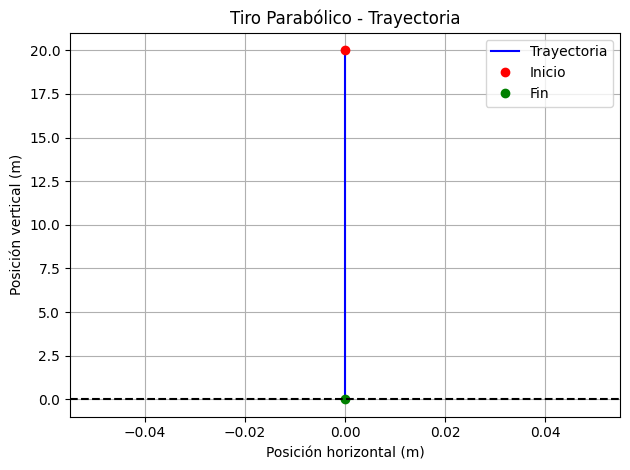

In [ ]:
import matplotlib.pyplot as plt
import math

class TiroParabolico:
    """
    Clase que representa un tiro parabólico.
    """

    def __init__(self, altura, velocidad_inicial, angulo):
        """
        Inicializa un objeto TiroParabolico.

        Args:
            altura (float): La altura inicial en metros.
            velocidad_inicial (float): La velocidad inicial en m/s.
            angulo (float): El ángulo de lanzamiento en grados.
        """
        self.altura = altura
        self.velocidad_inicial = velocidad_inicial
        self.angulo = angulo

    def calcular_tiempo_vuelo(self):
        """
        Calcula el tiempo de vuelo del tiro parabólico.

        Returns:
            float: El tiempo de vuelo en segundos.
        """
        tiempo_vuelo = (2 * self.velocidad_inicial * math.sin(math.radians(self.angulo))) / 9.8
        return tiempo_vuelo

    def calcular_alcance_horizontal(self):
        """
        Calcula el alcance horizontal del tiro parabólico.

        Returns:
            float: El alcance horizontal en metros.
        """
        alcance_horizontal = (self.velocidad_inicial ** 2 * math.sin(math.radians(2 * self.angulo))) / 9.8
        return alcance_horizontal

    def calcular_altura_maxima(self):
        """
        Calcula la altura máxima alcanzada por el tiro parabólico.

        Returns:
            float: La altura máxima en metros.
        """
        altura_maxima = self.altura + (self.velocidad_inicial ** 2 * math.sin(math.radians(self.angulo)) ** 2) / (2 * 9.8)
        return altura_maxima

    def calcular_posicion(self, tiempo):
        """
        Calcula la posición (x, y) del tiro parabólico en un tiempo dado.

        Args:
            tiempo (float): El tiempo en segundos.

        Returns:
            tuple: Las coordenadas (x, y) de la posición en metros.
        """
        posicion_x = self.velocidad_inicial * math.cos(math.radians(self.angulo)) * tiempo
        posicion_y = self.altura + self.velocidad_inicial * math.sin(math.radians(self.angulo)) * tiempo - 0.5 * 9.8 * tiempo ** 2
        return posicion_x, posicion_y

class CaidaLibre(TiroParabolico):
    """
    Clase que representa una caída libre.
    Hereda de la clase TiroParabolico.
    """

    def __init__(self, altura, velocidad_inicial, angulo):
        """
        Inicializa un objeto CaidaLibre.

        Args:
            altura (float): La altura inicial en metros.
            velocidad_inicial (float): La velocidad inicial en m/s.
            angulo (float): El ángulo de lanzamiento en grados.
        """
        super().__init__(altura, velocidad_inicial, angulo)

    def calcular_tiempo_vuelo(self):
        """
        Calcula el tiempo de vuelo de la caída libre.

        Returns:
            float: El tiempo de vuelo en segundos.
        """
        tiempo_vuelo = math.sqrt((2 * self.altura) / 9.8)
        return tiempo_vuelo

    def calcular_alcance_horizontal(self):
        """
        Calcula el alcance horizontal de la caída libre.
        En la caída libre, el alcance horizontal siempre es cero.

        Returns:
            float: El alcance horizontal, que es siempre cero.
        """
        alcance_horizontal = 0  # No hay alcance horizontal en caída libre
        return alcance_horizontal

    def calcular_altura_maxima(self):
        """
        Calcula la altura máxima de la caída libre.
        En la caída libre, la altura máxima es igual a la altura inicial.

        Returns:
            float: La altura máxima, que es igual a la altura inicial.
        """
        altura_maxima = self.altura  # Altura máxima igual a la altura inicial en caída libre
        return altura_maxima

def verificar_valores_numericos(func):
    """
    Decorador que verifica que los valores ingresados sean numéricos.

    Args:
        func (function): La función a decorar.

    Returns:
        function: La función decorada.
    """
    def wrapper():
        while True:
            altura = input("Ingrese la altura inicial (en metros): ")
            velocidad_inicial = input("Ingrese la velocidad inicial (en m/s): ")
            angulo = input("Ingrese el ángulo de lanzamiento (en grados): ")

            try:
                altura = float(altura)
                velocidad_inicial = float(velocidad_inicial)
                angulo = float(angulo)
                break
            except ValueError:
                print("Los valores deben ser numéricos. Intente nuevamente.")

        return func(altura, velocidad_inicial, angulo)

    return wrapper

@verificar_valores_numericos
def ingresar_valores(altura, velocidad_inicial, angulo):
    """
    Función que solicita al usuario ingresar los valores necesarios para el tiro parabólico.

    Args:
        altura (float): La altura inicial en metros.
        velocidad_inicial (float): La velocidad inicial en m/s.
        angulo (float): El ángulo de lanzamiento en grados.

    Returns:
        tuple: Una tupla con los valores ingresados.
    """
    return altura, velocidad_inicial, angulo

def main(altura, velocidad_inicial, angulo):
    """
    Función principal del programa.

    Args:
        altura (float): La altura inicial en metros.
        velocidad_inicial (float): La velocidad inicial en m/s.
        angulo (float): El ángulo de lanzamiento en grados.
    """
    if velocidad_inicial > 0:
        tiro = TiroParabolico(altura, velocidad_inicial, angulo)
    else:
        tiro = CaidaLibre(altura, velocidad_inicial, angulo)

    tiempo_vuelo = tiro.calcular_tiempo_vuelo()
    alcance_horizontal = tiro.calcular_alcance_horizontal()
    altura_maxima = tiro.calcular_altura_maxima()

    print(f"Tiempo de vuelo: {tiempo_vuelo:.2f} segundos")
    print(f"Alcance horizontal: {alcance_horizontal:.2f} metros")
    print(f"Altura máxima: {altura_maxima:.2f} metros")

    num_puntos = 100
    tiempos = [t * tiempo_vuelo / num_puntos for t in range(num_puntos + 1)]
    trayectoria = [tiro.calcular_posicion(tiempo) for tiempo in tiempos]
    trayectoria_x = [posicion[0] for posicion in trayectoria]
    trayectoria_y = [posicion[1] for posicion in trayectoria]

    fig, ax = plt.subplots()
    ax.plot(trayectoria_x, trayectoria_y, 'b-', label='Trayectoria')
    ax.plot(trayectoria_x[0], trayectoria_y[0], 'ro', label='Inicio')
    ax.plot(trayectoria_x[-1], 0, 'go', label='Fin')  # Punto final en altura 0
    ax.axhline(y=0, color='k', linestyle='--')  # Línea que representa el suelo

    plt.xlabel('Posición horizontal (m)')
    plt.ylabel('Posición vertical (m)')
    plt.title('Tiro Parabólico - Trayectoria')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

altura, velocidad_inicial, angulo = ingresar_valores()
main(altura, velocidad_inicial, angulo)
